In [2]:
import cv2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 


Using Theano backend.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False)

def get_feature(img, layer, model):
    
    model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer).output)



    x = cv2.resize(img, (240,240))
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)

    return features




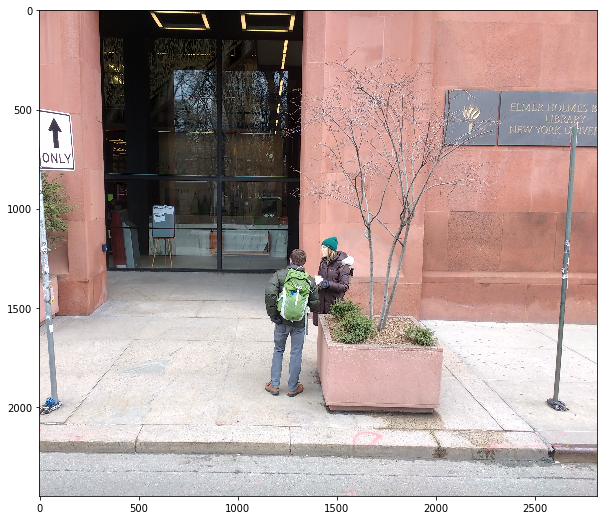

In [6]:
plt.figure(figsize=(10,10))
img_path = '../data/36363052.jpg'
x = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(x[:,450:,:])

In [7]:
from skimage import img_as_float
img_path = '../data/1620577.jpg'
x = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
resized_image = img_as_float(cv2.resize(x[400:2100,150:,:], (1280,1280)))

img_path2 = '../data/36363026.jpg'
x = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB)
resized_image2 = img_as_float(cv2.resize(x[300:2320,:3000,:], (1280,1280)))



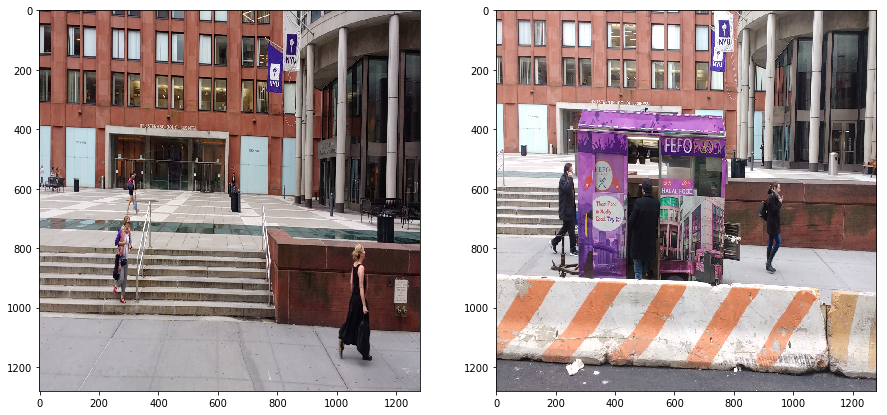

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(resized_image)
#ax1.set_title('Sharing Y axis')
ax2.imshow(resized_image2)
plt.show()

In [9]:
from sklearn.preprocessing import normalize
def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

def norm(v):

    v_min = v.min(axis=(0, 1))
    v_max = v.max(axis=(0, 1))
    normed = (v - v_min)/(v_max - v_min)
    normed = np.nan_to_num(normed)
    
    return normed


def norm_dist(i1, i2):
    return np.linalg.norm(i1-i2)



In [10]:
a=b=np.linspace(0, resized_image.shape[0], resized_image.shape[0]/100.0, dtype=int)

/Users/Henrilin28/anaconda3/envs/carmera/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [12]:

cal_value2 = np.empty([resized_image.shape[0], resized_image.shape[0]])
for row in range(len(a)-1):
    for col in range(len(b)-1):
        temp = resized_image[a[row]:a[row+1], b[col]:b[col+1],:]
        temp2 = resized_image2[a[row]:a[row+1], b[col]:b[col+1],:]
        
        feature_1_3 = norm(get_feature(temp, 'block3_pool', base_model)[0])
        feature_2_3 = norm(get_feature(temp2, 'block3_pool', base_model)[0]) 
        
        feature_1_5 = norm(get_feature(temp, 'block5_pool', base_model)[0])
        feature_2_5 = norm(get_feature(temp2, 'block5_pool', base_model)[0])
        
        cal_value2[a[row]:a[row+1], b[col]:b[col+1]] = np.sum(norm(feature_1_3.mean(axis=2) - 
                                                                   feature_2_3.mean(axis=2)))\
                                                               +np.sum(norm(feature_1_5.mean(axis=2) - 
                                                                            feature_2_5.mean(axis=2)))
                                                                       


In [349]:

cal_value2 = np.empty([resized_image.shape[0], resized_image.shape[0]])
for row in range(len(a)-1):
    for col in range(len(b)-1):
        temp = resized_image[a[row]:a[row+1], b[col]:b[col+1],:]
        temp2 = resized_image2[a[row]:a[row+1], b[col]:b[col+1],:]
        
        feature_1_3 = get_feature(temp, 'block3_pool', base_model)[0]
        feature_2_3 = get_feature(temp2, 'block3_pool', base_model)[0]
        
        feature_1_5 = get_feature(temp, 'block5_pool', base_model)[0]
        feature_2_5 = get_feature(temp2, 'block5_pool', base_model)[0]
        
        cal_value2[a[row]:a[row+1], b[col]:b[col+1]] = calculateDistance(feature_1_3, feature_2_3)\
                                                               +calculateDistance(feature_1_5, feature_2_5)


In [14]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed

In [64]:
segments = slic(resized_image2, n_segments = 15, sigma = 5)

In [28]:
segments_fz = felzenszwalb(resized_image2, scale=300, sigma=5, min_size=500)

In [17]:
segments_fz2 = felzenszwalb(resized_image, scale=50, sigma=1, min_size=500)

In [199]:
import pickle
pickle.dump(cal_value2,open('distance2.pkl', 'wb'))

In [65]:
temp2 = cal_value2.copy()

In [66]:
for i in range(segments.max()):
    temp2[np.where(segments ==i)] = temp2[np.where(segments ==i)].sum()/len(np.where(segments ==i)[0])

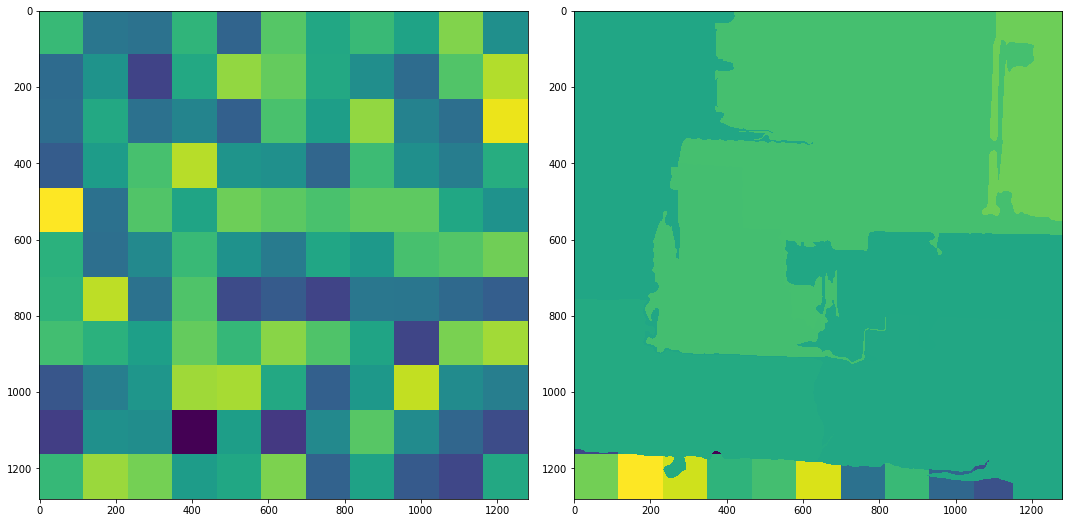

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(cal_value2)
#ax1.set_title('Sharing Y axis')
ax2.imshow(temp2)

plt.tight_layout()
#plt.savefig('result1.png')
plt.show()


In [68]:
np.percentile(temp2, 75)

494.70766515095124

In [71]:
temp3 = resized_image2.copy()
temp = resized_image.copy()
row, col = np.where((temp2 > np.percentile(temp2, 60)) )
for r, c in zip(row, col):
    temp3[r,c,0] =1
    temp[r,c,0] =1


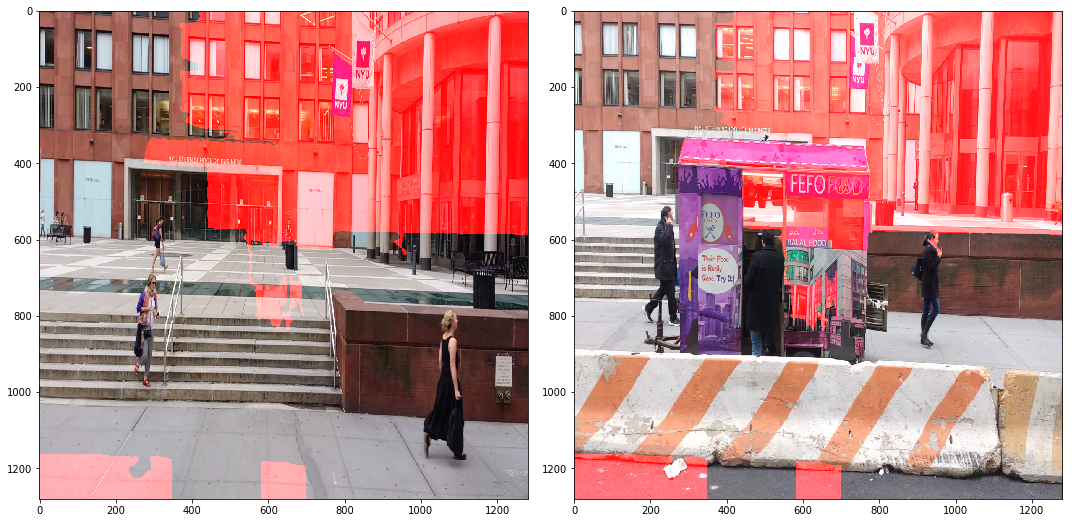

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(temp)
#ax1.set_title('Sharing Y axis')
ax2.imshow(temp3)

plt.tight_layout()
plt.savefig('result1_1.png')
plt.show()

In [161]:
a=b=np.linspace(0, resized_image.shape[0], resized_image.shape[0]/150.0, dtype=int)

temp3 = resized_image2.copy()
temp = resized_image.copy()
row, col = np.where((temp2 > 2.5) & (temp2 < 2.56874))
for r, c in zip(row, col):
    temp3[r,c,0] =1
    temp[r,c,0] =1


/Users/Henrilin28/anaconda3/envs/carmera/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


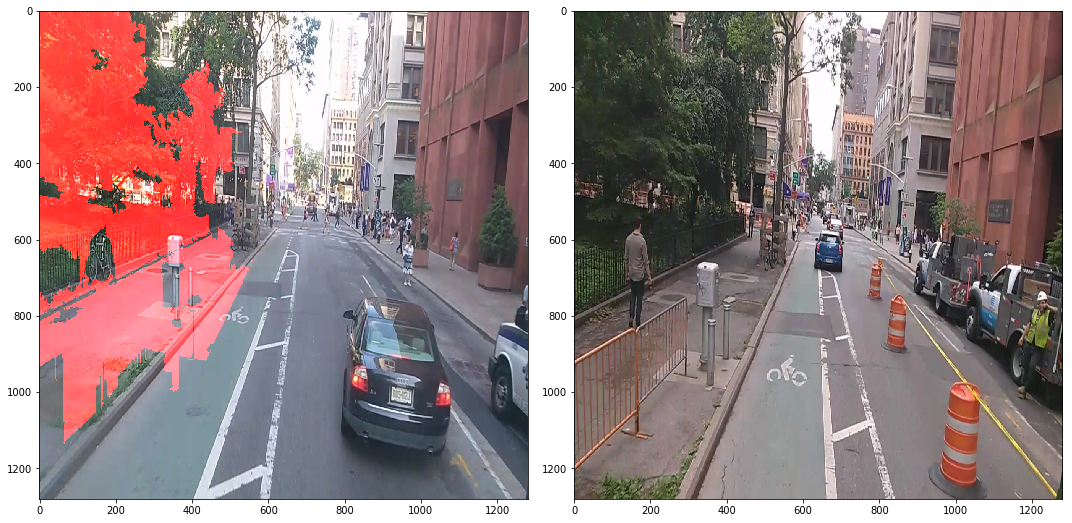

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(temp)
#ax1.set_title('Sharing Y axis')
ax2.imshow(resized_image2)

plt.tight_layout()
plt.savefig('result2.png')
plt.show()

In [258]:
img_path = '../data/36363019.jpg'
x = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
resized_image = img_as_float(cv2.resize(x, (1280,1280)))

img_path2 = '../data/36363053.jpg'
x = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB)
resized_image2 = img_as_float(cv2.resize(x, (1280,1280)))



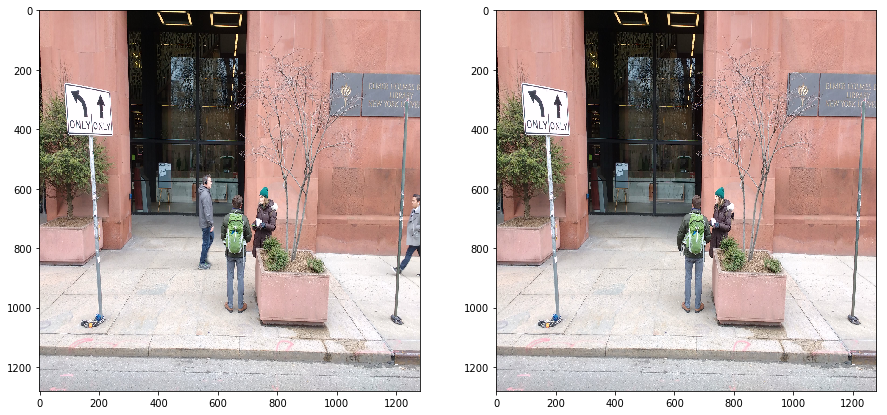

In [224]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(resized_image)
#ax1.set_title('Sharing Y axis')
ax2.imshow(resized_image2)
plt.show()

In [225]:
a=b=np.linspace(0, resized_image.shape[0], resized_image.shape[0]/100.0, dtype=int)

/Users/Henrilin28/anaconda3/envs/carmera/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [226]:

cal_value2 = np.empty([resized_image.shape[0], resized_image.shape[0]])
for row in range(len(a)-1):
    for col in range(len(b)-1):
        temp = resized_image[a[row]:a[row+1], b[col]:b[col+1],:]
        temp2 = resized_image2[a[row]:a[row+1], b[col]:b[col+1],:]
        
        feature_1_3 = norm(get_feature(temp, 'block3_pool', base_model)[0])
        feature_2_3 = norm(get_feature(temp2, 'block3_pool', base_model)[0]) 
        
        feature_1_5 = norm(get_feature(temp, 'block5_pool', base_model)[0])
        feature_2_5 = norm(get_feature(temp2, 'block5_pool', base_model)[0])
        
        cal_value2[a[row]:a[row+1], b[col]:b[col+1]] = calculateDistance(feature_1_3, feature_2_3)\
                                                               +calculateDistance(feature_1_5, feature_2_5)


In [289]:
segments_fz = felzenszwalb(resized_image, scale=200, sigma=1, min_size=50)

In [290]:
temp2 = cal_value2.copy()
for i in range(segments_fz.max()):
    temp2[np.where(segments_fz ==i)] = temp2[np.where(segments_fz ==i)].sum()/len(np.where(segments_fz ==i)[0])

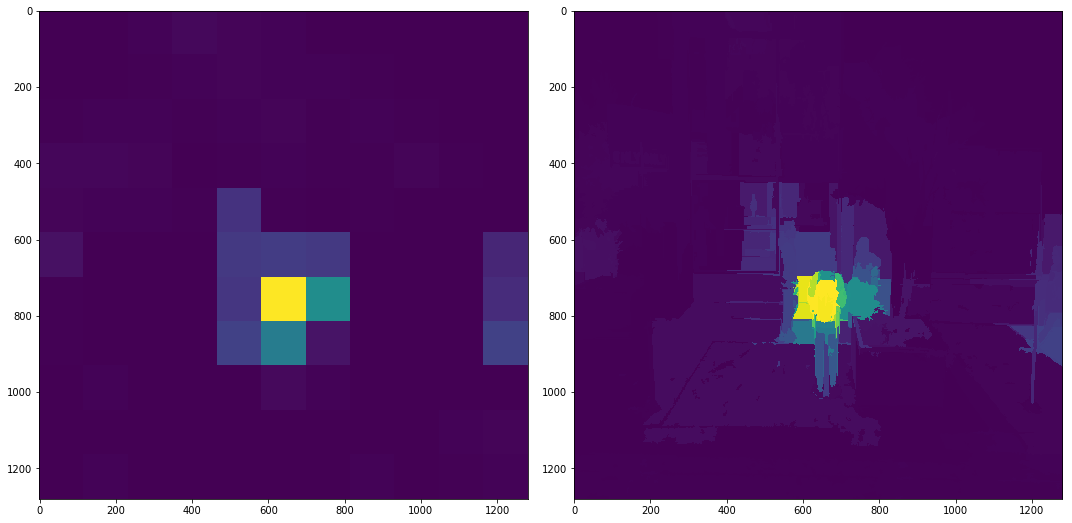

In [291]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(cal_value2)
#ax1.set_title('Sharing Y axis')
ax2.imshow(temp2)

plt.tight_layout()
#plt.savefig('result1.png')
plt.show()


In [292]:
np.mean(temp2)

4.9436857877713916

In [299]:
temp3 = resized_image2.copy()
temp = resized_image.copy()
row, col = np.where((temp2 > 15) & (temp2 < 30))
for r, c in zip(row, col):
    temp3[r,c,0] =1
    temp[r,c,0] =1


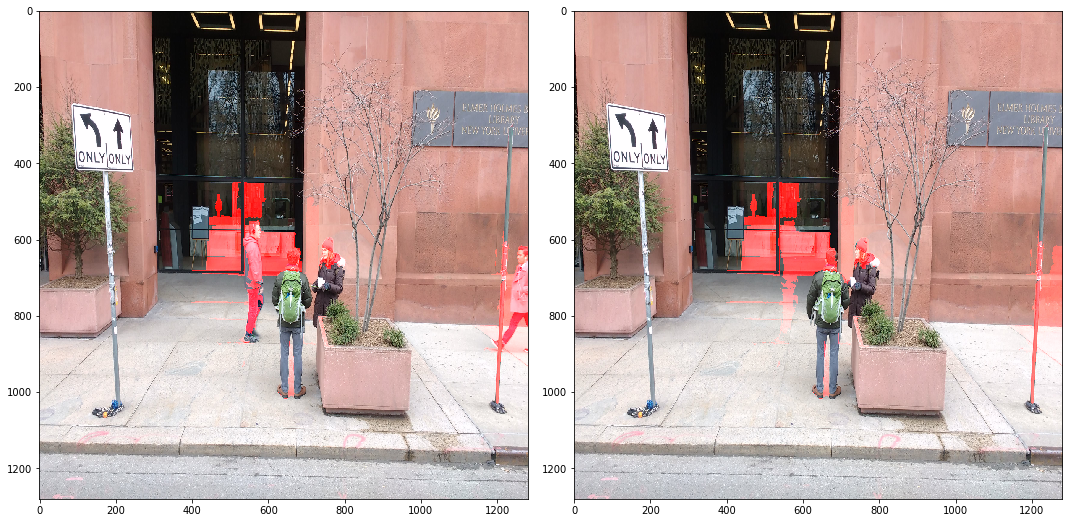

In [300]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(temp)
#ax1.set_title('Sharing Y axis')
ax2.imshow(temp3)

plt.tight_layout()
plt.savefig('result3.png')
plt.show()